In [220]:
import pandas as pd
import numpy as np
import requests
import re
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import seaborn as sns
from scipy import stats
from IPython.display import HTML, display
import datetime

# ## Gather Data


In [51]:
#Read data from csv file twitter-archive-enhanced.csv
df_twitter_archieve = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [52]:
# Download the image prediction file using the link provided to Udacity students
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode= 'wb')as file:
 file.write(response.content)
##test request
response


<Response [200]>

In [53]:
# Showing  data in the image predictions file
df_image_predictions = pd.read_csv('image-predictions.tsv',sep ='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
# #Twitter API & JSON
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)



In [55]:
 #more information from JSON dictionaries in txt file
# put it in a dataframe called tweet JSON
df_list =[]
with open('tweet_json.txt',encoding='utf8')as file :
   for line in file:
    all_data=json.loads(line)
    df_list.append(all_data)

# check the tweets list

df_list[:1]
        
    
        
 

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [56]:
df_list =[]
with open('tweet_json.txt',encoding='utf8')as file :
    for line in file:
        #json.load(file_object)
     all_data=json.loads(line)
     tweet_id = all_data['id']
     retweet_count = all_data['retweet_count']
     fav_count = all_data['favorite_count']
     df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
df_tweet=pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tweet.count()
df_tweet.head()

        
      
        

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8315,38014
1,892177421306343426,6142,32641
2,891815181378084864,4067,24565
3,891689557279858688,8450,41365
4,891327558926688256,9157,39551


# #Assessing data

Assessing Data
In this section the data sources are going to be assessed one by one. 


 (Visual assessment) Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [57]:
df_twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Observations :
The source contains html residues
The variables doggo, floofer, pupper and puppo present in the data as depicted above, all represent one single variable 
As the tidyness rule---> should be a part of a single column

In [58]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [59]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8315,38014
1,892177421306343426,6142,32641
2,891815181378084864,4067,24565
3,891689557279858688,8450,41365
4,891327558926688256,9157,39551
...,...,...,...
2334,666049248165822465,41,106
2335,666044226329800704,139,292
2336,666033412701032449,43,123
2337,666029285002620928,47,126


(Programmatic assessment) Pandas' functions and/or methods are used to assess the data.

 Table 1: df_twitter_archieve

In [60]:
# Checking the overall table structure--> data types and for missing values.

df_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Missing values in serveral columns.  data types are reasonable.

 for values missing in the column "expanded_urls".

In [61]:
 df_twitter_archieve.expanded_urls.value_counts()

https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1                                                                                                                                                          2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/669000397445533696/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/809920764300447744/photo/1                                                                                                                                                          

 duplicates withtin one single cell
    

In [62]:
# Check for duplicate rows across all columns.
sum( df_twitter_archieve.duplicated())


0

 Checking for duplicates for the index-colum tweet ID. 
in this  column should no duplicated values be present.

In [63]:
sum(df_twitter_archieve.tweet_id.duplicated())

0

Checking for duplicates for the index-colum text

In [64]:
sum(df_twitter_archieve.text.duplicated())

0

In [65]:
df_twitter_archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
df_twitter_archieve.rating_numerator.value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [67]:

# Filtering outlying valuesof column rating_numerator
df_numerator_Filter = df_twitter_archieve[(df_twitter_archieve.rating_numerator > 20) | (df_twitter_archieve.rating_numerator < 1)]
df_numerator_Filter.info()
# 26 rows have strang numerator values.
#check the details
df_numerator_Filter


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 188 to 2074
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    26 non-null     int64  
 1   in_reply_to_status_id       6 non-null      float64
 2   in_reply_to_user_id         6 non-null      float64
 3   timestamp                   26 non-null     object 
 4   source                      26 non-null     object 
 5   text                        26 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               22 non-null     object 
 10  rating_numerator            26 non-null     int64  
 11  rating_denominator          26 non-null     int64  
 12  name                        26 non-null     object 
 13  doggo                       26 no

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [68]:
#print whole text in order to verify numerators and denominators
print(df_twitter_archieve['text'][189])
print(df_twitter_archieve['text'][188])
print(df_twitter_archieve['text'][313])
print(df_twitter_archieve['text'][315])
print(df_twitter_archieve['text'][902])
print(df_twitter_archieve['text'][979]) 
print(df_twitter_archieve['text'][1016]) 
print(df_twitter_archieve['text'][1202])
print(df_twitter_archieve['text'][1228]) 
print(df_twitter_archieve['text'][1254]) 
print(df_twitter_archieve['text'][1433])
print(df_twitter_archieve['text'][1634]) 
print(df_twitter_archieve['text'][1635]) 
print(df_twitter_archieve['text'][1712]) 
print(df_twitter_archieve['text'][1779]) 
print(df_twitter_archieve['text'][1843]) 
print(df_twitter_archieve['text'][2074]) 



@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens nex

In [69]:
df_twitter_archieve.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [70]:
# Filtering outlying valuesof column rating_numerator
df_denominator_Filter = df_twitter_archieve[(df_twitter_archieve.rating_denominator !=10) ]
df_denominator_Filter.info()
# 17 rows have strang numerator values.
#check the details
df_denominator_Filter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 313 to 2335
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    23 non-null     int64  
 1   in_reply_to_status_id       5 non-null      float64
 2   in_reply_to_user_id         5 non-null      float64
 3   timestamp                   23 non-null     object 
 4   source                      23 non-null     object 
 5   text                        23 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               19 non-null     object 
 10  rating_numerator            23 non-null     int64  
 11  rating_denominator          23 non-null     int64  
 12  name                        23 non-null     object 
 13  doggo                       23 no

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [71]:

print(df_twitter_archieve['text'][516])
print(df_twitter_archieve['text'][313])
print(df_twitter_archieve['text'][342])
print(df_twitter_archieve['text'][433])
print(df_twitter_archieve['text'][516])
print(df_twitter_archieve['text'][784])
print(df_twitter_archieve['text'][902])
print(df_twitter_archieve['text'][1068])
print(df_twitter_archieve['text'][1120])
print(df_twitter_archieve['text'][1202])
print(df_twitter_archieve['text'][1598])
print(df_twitter_archieve['text'][1634]
     )



Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 20

In [72]:
df_twitter_archieve['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Crouton      1
Rambo        1
Tassy        1
Bert         1
Dixie        1
Name: name, Length: 957, dtype: int64

In [73]:
df_twitter_archieve[df_twitter_archieve.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [74]:
df_twitter_archieve[df_twitter_archieve.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [75]:
sum(df_twitter_archieve.expanded_urls.duplicated())

137

The "timestamp" is present as an object, which is supposed to be converted into datetime to be exploitable.
We can observe that there are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.
Some entries are missing expanded URL's.
The "tweet_id" currently present as an 'INT' should be converted to 'string' datatype.



In [76]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
sum(df_image_predictions.jpg_url.duplicated())

66

In [78]:
df = df_image_predictions[df_image_predictions.duplicated(subset=['tweet_id','jpg_url'], keep=False)]
df
#that mean  there are 66 duplicates entries present, however, they have a different tweet id.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [79]:
df_image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
nail                    1
coil                    1
tiger_shark             1
rain_barrel             1
mailbox                 1
Name: p1, Length: 378, dtype: int64

In [80]:
df_image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
chickadee              1
red_wolf               1
axolotl                1
plunger                1
rock_crab              1
Name: p3, Length: 408, dtype: int64

In [81]:
df_p_dog_exists = df_image_predictions[(df_image_predictions['p1_dog'] == False) & 
                                    (df_image_predictions['p2_dog'] == False) &
                                    (df_image_predictions['p3_dog'] == False)]
df_p_dog_exists.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
199,669661792646373376,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,European_fire_salamander,0.043178,False
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False


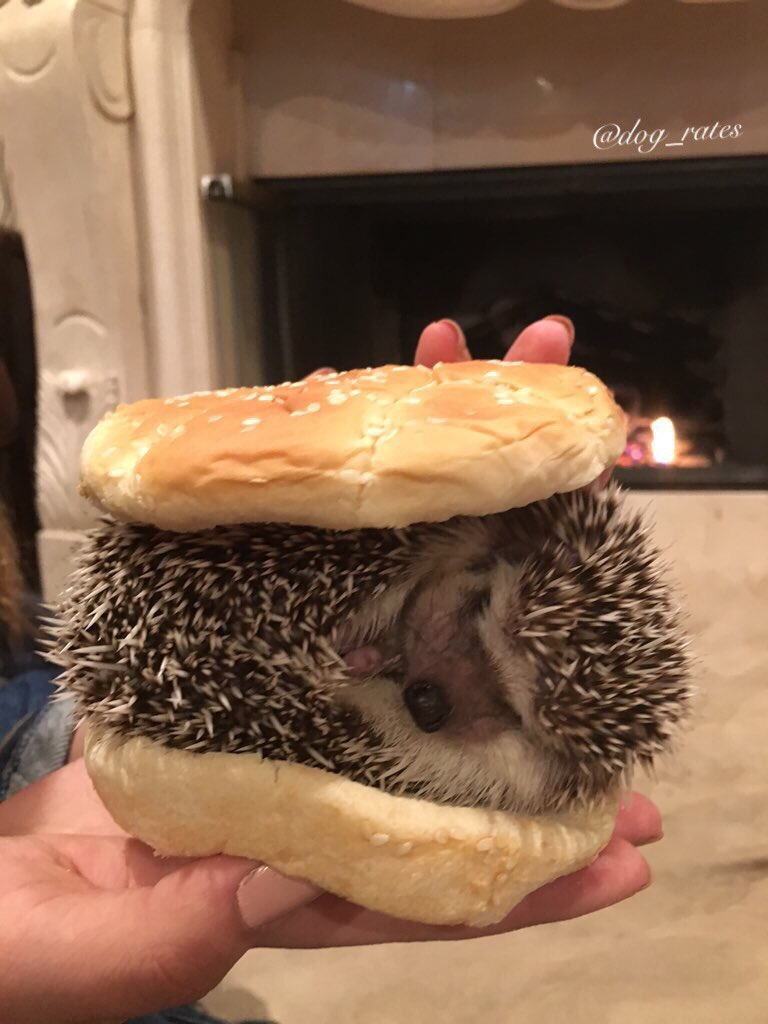

In [82]:
Image('https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg')

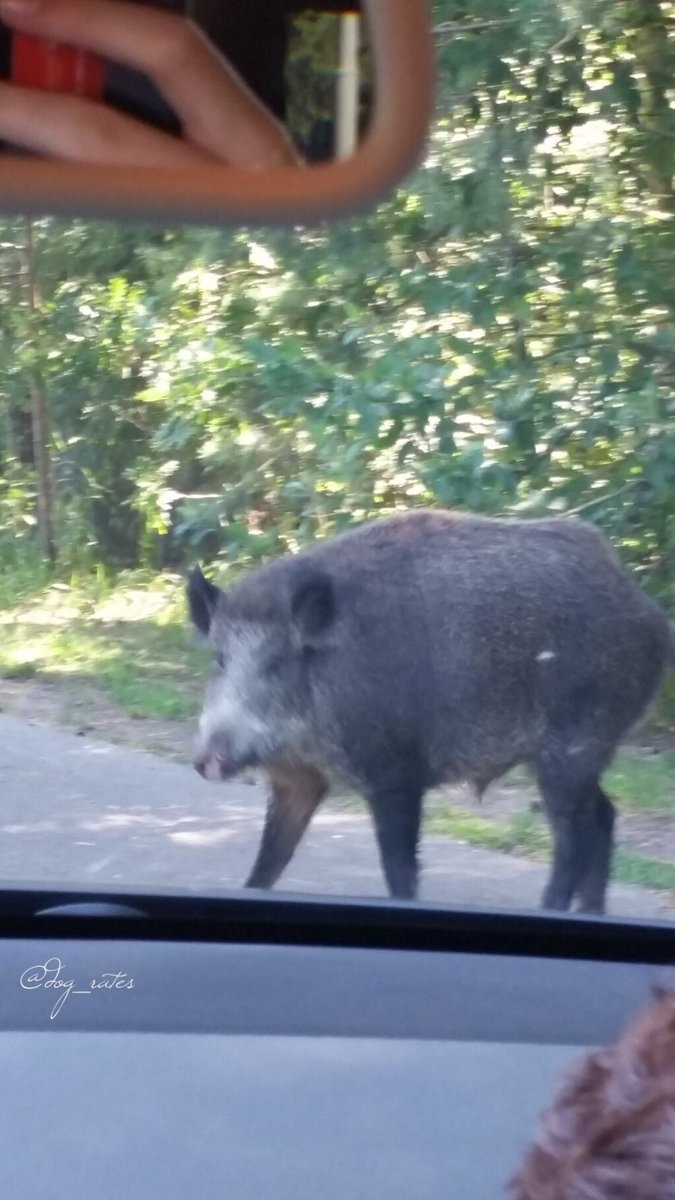

In [83]:
Image('https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg')

In [84]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2339 non-null   int64
 1   retweet_count   2339 non-null   int64
 2   favorite_count  2339 non-null   int64
dtypes: int64(3)
memory usage: 54.9 KB


In [85]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.422447e+17,2928.929885,7961.119282
std,6.832765e+16,4934.049982,12328.654834
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,587.500000,1371.000000
50%,7.186315e+17,1363.000000,3454.000000
75%,7.986962e+17,3413.500000,9739.500000
max,8.924206e+17,83626.000000,164232.000000


### SUmmery
Quality 
#### `df_twitter_archive` table
- 181 Retweets
- Missing data in expanded_urls (Tweets without images)
Duplicate expanded_urls present: most duplicated image URLs are present in rows with retweets
- Everypost should be related to rated dog picture 
- The columns rating_numerator and rating_denominator have illogical values.
- Incorrect dog names (a, an, the, etc.)
- Missing values in dog names (represented as None)
- Erroneous datatype (tweet_id, timestamp)
- Hard to understand the source from source column
- Dog stage's type to categorical
 Rows with empty values shall be deleted.


#### `df_image_predictions` table
- Missing records (2075 instead of 2356, some of them are probably the retweets, replies or tweets with no images)
- Image predictions that are not dog breed
- Lowercase breed names in p1, p2, p3 and '_' is used instead of space.
-Duplicated image URLs there are 66 duplicates entries present, however, each pair has a different tweet id
that is why these duplicates will not be removed. 
-The false values of the columns p1 to p4_dog imply not all images are showing dogs. 
visualize test revealed chances are high the image contains a dog when
at least one of the values per be  true. so all other rows shall be deleted.
-In the columns p1, p2, p3 single words are separated by an underscore. Underscores will be replaced by spaces.




### Tidiness
- Merge three data frames.
- Drop unneeded columns.
- Combine dog "stage" columns (i.e. doggo, floofer, pupper, and puppo) into one column.
- Combine rating_numerator and rating_denominator columns into one column.


# Clean Data

This section consists of the cleaning the data wrangling process:
Define
Code
Test

In [94]:
# Create the copies of the dataframes which will be cleaned
df_twitter_archieve_clean = df_twitter_archieve.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_clean = df_tweet.copy()

In [95]:
df_twitter_archieve_clean.info()
df_image_predictions_clean.info()
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Dfine ##Deleting rows with retweets and responses.



code

In [96]:
df_twitter_archieve_clean= df_twitter_archieve_clean[df_twitter_archieve_clean.in_reply_to_status_id.isnull()] 
df_twitter_archieve_clean= df_twitter_archieve_clean[df_twitter_archieve_clean.retweeted_status_id.isnull()] 


## test


In [102]:
df_twitter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Missing data in expanded_urls

   Define 
   Remove the tweets without expanded_urls ----> images by keeping the non null data expanded_urls column

In [103]:
#code
df_twitter_archieve_clean =df_twitter_archieve_clean [df_twitter_archieve_clean .expanded_urls.notnull()]

In [104]:
# test
df_twitter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

In [105]:
# more check:
sum(df_twitter_archieve_clean.expanded_urls != "")

2094

### Define Some rows contain the value twice, separated by a comma.delete them

In [106]:
# code

df_twitter_archieve_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                      2
https://twitter.com/dog_rates/status/698635131305795584/video/1    1
https://twitter.com/dog_rates/status/672884426393653248/photo/1    1
https://twitter.com/dog_rates/status/699323444782047232/photo/1    1
https://twitter.com/dog_rates/status/876484053909872640/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/702217446468493312/photo/1    1
https://twitter.com/dog_rates/status/670338931251150849/photo/1    1
https://twitter.com/dog_rates/status/708026248782585858/video/1    1
https://twitter.com/dog_rates/status/684959798585110529/photo/1    1
https://twitter.com/dog_rates/status/670797304698376195/photo/1    1
Name: expanded_urls, Length: 2093, dtype: int64

In [108]:
df_twitter_archieve_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                      2
https://twitter.com/dog_rates/status/698635131305795584/video/1    1
https://twitter.com/dog_rates/status/672884426393653248/photo/1    1
https://twitter.com/dog_rates/status/699323444782047232/photo/1    1
https://twitter.com/dog_rates/status/876484053909872640/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/702217446468493312/photo/1    1
https://twitter.com/dog_rates/status/670338931251150849/photo/1    1
https://twitter.com/dog_rates/status/708026248782585858/video/1    1
https://twitter.com/dog_rates/status/684959798585110529/photo/1    1
https://twitter.com/dog_rates/status/670797304698376195/photo/1    1
Name: expanded_urls, Length: 2093, dtype: int64

In [110]:
df_twitter_archieve_clean['expanded_urls_cleaned'] = df_twitter_archieve_clean.expanded_urls.str.split(',').str[0]
df_twitter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

In [111]:
df_twitter_archieve_clean.drop('expanded_urls', axis = 1, inplace=True)
df_twitter_archieve_clean.rename(columns={'expanded_urls_cleaned':'expanded_urls'}, inplace=True)
#i end this step after ending the project that is why i will not run the code 

In [112]:
df_twitter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            2094 non-null   int64  
 10  rating_denominator          2094 non-null   int64  
 11  name                        2094 non-null   object 
 12  doggo                       2094 non-null   object 
 13  floofer                     2094 

## Merge data frames

In [ ]:
# Define
Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types
.


In [113]:
df_merge2 = pd.concat([df_twitter_archieve_clean,df_image_predictions_clean,df_tweet_clean], join='outer', axis=1)


In [115]:
df_merge2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13.0,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,8315.0,38014.0
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,6142.0,32641.0
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4067.0,24565.0
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8450.0,41365.0
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,9157.0,39551.0


In [116]:
df_merge2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'expanded_urls',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [117]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   float64
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            2094 non-null   float64
 10  rating_denominator          2094 non-null   float64
 11  name                        2094 non-null   object 
 12  doggo                       2094 non-null   object 
 13  floofer                     2094 

### Define : Delete retweets

In [118]:
df_merge2 = df_merge2[df_merge2.retweet_count.notnull()]

In [119]:
df_merge3 = df_merge2[df_merge2.retweet_count.notnull()]

In [120]:
# test
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2077 non-null   float64
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2077 non-null   object 
 4   source                      2077 non-null   object 
 5   text                        2077 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            2077 non-null   float64
 10  rating_denominator          2077 non-null   float64
 11  name                        2077 non-null   object 
 12  doggo                       2077 non-null   object 
 13  floofer                     2077 

### defind Drop unneeded columns¶

Drop the the columns related to the retweets and the replies: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id.

In [121]:
df_merge2 = df_merge2.drop(['retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)



In [122]:
df_merge2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2077 non-null   float64
 1   timestamp           2077 non-null   object 
 2   source              2077 non-null   object 
 3   text                2077 non-null   object 
 4   rating_numerator    2077 non-null   float64
 5   rating_denominator  2077 non-null   float64
 6   name                2077 non-null   object 
 7   doggo               2077 non-null   object 
 8   floofer             2077 non-null   object 
 9   pupper              2077 non-null   object 
 10  puppo               2077 non-null   object 
 11  expanded_urls       2077 non-null   object 
 12  tweet_id            2075 non-null   float64
 13  jpg_url             2075 non-null   object 
 14  img_num             2075 non-null   float64
 15  p1                  2075 non-null   object 
 16  p1_con

test

In [123]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2077 non-null   float64
 1   timestamp           2077 non-null   object 
 2   source              2077 non-null   object 
 3   text                2077 non-null   object 
 4   rating_numerator    2077 non-null   float64
 5   rating_denominator  2077 non-null   float64
 6   name                2077 non-null   object 
 7   doggo               2077 non-null   object 
 8   floofer             2077 non-null   object 
 9   pupper              2077 non-null   object 
 10  puppo               2077 non-null   object 
 11  expanded_urls       2077 non-null   object 
 12  tweet_id            2075 non-null   float64
 13  jpg_url             2075 non-null   object 
 14  img_num             2075 non-null   float64
 15  p1                  2075 non-null   object 
 16  p1_con

Remove columns no longer needed suplicated if ther is

In [124]:
# df = df.loc[:,~df.columns.duplicated()]
df_merge2=df_merge2.loc[:,~df_merge2.columns.duplicated()]


In [125]:
df_merge2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'expanded_urls', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

### defind: Change tweet_id from an integer to a string

In [126]:
# code
df_merge2['tweet_id']=df_merge2['tweet_id'].astype(str)

In [127]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2339 non-null   object 
 1   timestamp           2077 non-null   object 
 2   source              2077 non-null   object 
 3   text                2077 non-null   object 
 4   rating_numerator    2077 non-null   float64
 5   rating_denominator  2077 non-null   float64
 6   name                2077 non-null   object 
 7   doggo               2077 non-null   object 
 8   floofer             2077 non-null   object 
 9   pupper              2077 non-null   object 
 10  puppo               2077 non-null   object 
 11  expanded_urls       2077 non-null   object 
 12  jpg_url             2075 non-null   object 
 13  img_num             2075 non-null   float64
 14  p1                  2075 non-null   object 
 15  p1_conf             2075 non-null   float64
 16  p1_dog

### defind timestamp to datetime format


Remove the time zone from the 'timestamp' column
Change the 'timestamp' column to a datetime object

In [128]:
# code
df_merge2['timestamp'] = df_merge2['timestamp'].str.slice(start=0, stop=-6)
df_merge2['timestamp'] = pd.to_datetime(df_merge2['timestamp'], format = "%Y-%m-%d %H:%M:%S")



In [129]:
# test
df_merge2.info()
df_merge2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2339 non-null   object        
 1   timestamp           2077 non-null   datetime64[ns]
 2   source              2077 non-null   object        
 3   text                2077 non-null   object        
 4   rating_numerator    2077 non-null   float64       
 5   rating_denominator  2077 non-null   float64       
 6   name                2077 non-null   object        
 7   doggo               2077 non-null   object        
 8   floofer             2077 non-null   object        
 9   pupper              2077 non-null   object        
 10  puppo               2077 non-null   object        
 11  expanded_urls       2077 non-null   object        
 12  jpg_url             2075 non-null   object        
 13  img_num             2075 non-null   float64     

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,8.924206435553362e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8315.0,38014.0
1,8.921774213063434e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6142.0,32641.0
2,8.918151813780849e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4067.0,24565.0
3,8.916895572798587e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8450.0,41365.0
4,8.913275589266883e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9157.0,39551.0


defind 

### Incorrect dog names (a, an, the, etc.) and missing values in dog names 

In [130]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_merge2.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df_merge2.loc[index,'name'] = df_merge2.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df_merge2.loc[index,'name'] = df_merge2.loc[index,'name'].replace('an', c_name)
    except IndexError:
        df_merge2.loc[index,'name'] = np.nan

            
df_merge2.name.value_counts(dropna = False)

None       592
NaN        295
Charlie     11
Lucy        11
Cooper      10
          ... 
Ronnie       1
Kaia         1
Diogi        1
Loomis       1
Zeus         1
Name: name, Length: 972, dtype: int64

In [131]:
# test
df_merge2.name.sample(10)

2246    Tedrick
596         NaN
788        None
1791       None
1072     Nollie
879        Theo
1421       Beau
2158      Linda
957         Max
190        None
Name: name, dtype: object

### defind
Standardize dog ratings

In [132]:
# code
df_merge2['rating_numerator'] = df_merge2['rating_numerator'].astype(float)

In [133]:
df_merge2['rating_denominator'] =df_merge2['rating_denominator'].astype(float)

In [134]:
# test
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2339 non-null   object        
 1   timestamp           2077 non-null   datetime64[ns]
 2   source              2077 non-null   object        
 3   text                2077 non-null   object        
 4   rating_numerator    2077 non-null   float64       
 5   rating_denominator  2077 non-null   float64       
 6   name                2044 non-null   object        
 7   doggo               2077 non-null   object        
 8   floofer             2077 non-null   object        
 9   pupper              2077 non-null   object        
 10  puppo               2077 non-null   object        
 11  expanded_urls       2077 non-null   object        
 12  jpg_url             2075 non-null   object        
 13  img_num             2075 non-null   float64     

In [135]:
# Compiling a regex to capture the decimal as well as whole numbers and testing it on some sample text from the dataframe
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
print(re.findall(num_p, 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'))
print(re.findall(num_p, 'This is Logan, the Chow who lived. He solemnly swears he''s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'))

[('13.5', '10')]
[('9.75', '10')]


In [136]:
df_merge2['rating_numerator'] = df_merge2.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False)

In [137]:
df_merge2.loc[10
            ]

tweet_id                                          8.900066081131725e+17
timestamp                                           2017-07-26 00:31:25
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Koda. He is a South Australian decksha...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               Koda
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
expanded_urls         https://twitter.com/dog_rates/status/890006608...
jpg_url                 https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
img_num                                                         

In [138]:
Image(url = ' https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg')

### Define  when  rating_numerator= 1 

In [139]:
df_merge2['rating_numerator'].sample(5)

2075    10
2111    11
1081    11
1251    12
1113    12
Name: rating_numerator, dtype: object

In [140]:


df_merge2.query('rating_numerator == 1')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [141]:
df_merge2 = df_merge2[df_merge2.rating_numerator != 1.0]


In [142]:
df_merge2.rating_numerator.sample(5)

1427     8
1512    11
2081    10
1196    12
1656    10
Name: rating_numerator, dtype: object

defind rating different than 10 
Notice 24/7 is not a rating so this tweet should be dropped.
50/50 and 4/20 are not the correct ratings and will be changed later.
Some of them include two ratings.
Some of them include more than one dog.

In [143]:
# Drop the tweet with the rating 24/7.
df_merge2 = df_merge2 .drop(labels=405,axis=0)

In [144]:
#test
df_merge2 [df_merge2 .rating_numerator==24]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### defind
Re-extract the ratings by taking the rating that has a denominator of 10 or *10


In [145]:
# Extract the rating_numerator
new_numerator = df_merge2.text.str.extract(r'(\d+(?:\.\d+)?)\/\d+0', expand=False)

# Compare the old rating numerator and the new one (for debugging purposes).
old_numerator= list(df_merge2.rating_numerator)
text = list(df_merge2.text)
for index, rating in enumerate(new_numerator):
    rating_old = old_numerator[index]
    if str(rating) != str(rating_old):
        print(text[index])
        print("Old: " + str(rating_old) + " New: " + str(rating) + "\n")

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Old: 24 New: nan

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Old: 9 New: 14

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Old: 7 New: 10

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Old: 1 New: 9



In [146]:
df_merge2['rating_numerator'] = new_numerator

In [147]:
#test
df_merge2.rating_numerator.at[990] = '11'
df_merge2.rating_denominator.at[990] = '10'
df_merge2.rating_numerator.at[953] = '13'
df_merge2.rating_denominator.at[953] = '10'
(df_merge2.rating_numerator.loc[990], df_merge2.rating_denominator.loc[990], 
df_merge2.rating_numerator.loc[953], df_merge2.rating_denominator.loc[953])

     

('11', 10.0, '13', 10.0)

In [148]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2338 non-null   object        
 1   timestamp           2076 non-null   datetime64[ns]
 2   source              2076 non-null   object        
 3   text                2076 non-null   object        
 4   rating_numerator    2075 non-null   object        
 5   rating_denominator  2076 non-null   float64       
 6   name                2043 non-null   object        
 7   doggo               2076 non-null   object        
 8   floofer             2076 non-null   object        
 9   pupper              2076 non-null   object        
 10  puppo               2076 non-null   object        
 11  expanded_urls       2076 non-null   object        
 12  jpg_url             2074 non-null   object        
 13  img_num             2074 non-null   float64     

In [149]:
df_merge2.rating_numerator =df_merge2.rating_numerator.astype(float)


#### Dfine
Combine rating_numerator and rating_denominator columns into one column


In [ ]:
 Define Create a rating column by dividing rating_numerator values by rating_denominator values

In [150]:
#code
df_merge2['rating'] = df_merge2.rating_numerator /df_merge2.rating_denominator



In [151]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 2338
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2338 non-null   object        
 1   timestamp           2076 non-null   datetime64[ns]
 2   source              2076 non-null   object        
 3   text                2076 non-null   object        
 4   rating_numerator    2075 non-null   float64       
 5   rating_denominator  2076 non-null   float64       
 6   name                2043 non-null   object        
 7   doggo               2076 non-null   object        
 8   floofer             2076 non-null   object        
 9   pupper              2076 non-null   object        
 10  puppo               2076 non-null   object        
 11  expanded_urls       2076 non-null   object        
 12  jpg_url             2074 non-null   object        
 13  img_num             2074 non-null   float64     

In [152]:
df_merge2.rating.value_counts()

1.200000      487
1.000000      432
1.100000      418
1.300000      287
0.900000      149
0.800000       95
0.700000       50
1.400000       38
0.500000       32
0.600000       30
0.300000       19
0.400000       15
0.200000        9
0.100000        4
177.600000      1
0.000000        1
42.000000       1
4.500000        1
1.127000        1
0.909091        1
1.272727        1
1.126000        1
0.975000        1
1.350000        1
Name: rating, dtype: int64

In [153]:
df_merge2.query('rating == 42.00').jpg_url

2074    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
Name: jpg_url, dtype: object

In [154]:
df_merge2.query('rating == 177.60').jpg_url

979    https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg
Name: jpg_url, dtype: object

In [155]:
display(HTML('<img src="https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg" />'))

In [156]:
df_merge2 = df_merge2.drop(labels=2074,axis=0)

In [157]:
display(HTML('<img src=" https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg" />'))

This is a dog rating but it is a very high number. So I will change this rating to 1.7 It will still be the highest rating.

In [158]:
df_merge2.rating.at[979] = 1.7

In [159]:
df_merge2.query('rating == 1.7')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
979,7.499812773741281e+17,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,None,None,None,...,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False,720.0,2297.0,1.7


# Define

 columns with special classifications.
 

In [160]:
# code
df_merge2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2338
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2337 non-null   object        
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2042 non-null   object        
 7   doggo               2075 non-null   object        
 8   floofer             2075 non-null   object        
 9   pupper              2075 non-null   object        
 10  puppo               2075 non-null   object        
 11  expanded_urls       2075 non-null   object        
 12  jpg_url             2073 non-null   object        
 13  img_num             2073 non-null   float64     

 Lowercase breed names in p1, p2, p3 and '_' is used instead of space

In [161]:
# code Replace the character '_' with space
for p in ['p1', 'p2', 'p3']:
    df_merge2[p] = df_merge2[p].str.replace('_',' ')

In [162]:
 #test
df_merge2[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### defind Capitalize the first letters.

In [163]:
for p in ['p1', 'p2', 'p3']:
    df_merge2[p] =  df_merge2[p].str.capitalize()

In [164]:

columns_corrected =  ["p1", "p2", "p3"]
for column in columns_corrected:
    df_merge2[column].replace('_', ' ', inplace=True, regex=True)    
    df_merge2[column] = df_merge2[column].str.title()

In [165]:
df_merge2[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


In [166]:
df_merge2.sample(10) # Visual check

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
1002,7.478858742732145e+17,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,8.0,10.0,NaN,None,None,None,...,True,Labrador Retriever,0.016301,True,Norfolk Terrier,0.001871,True,2303.0,6297.0,0.8
2187,6.689798066718843e+17,2015-11-24 02:29:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,12.0,10.0,Chaz,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,1057.0,1.2
471,8.16697700272001e+17,2017-01-04 17:27:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,12.0,10.0,Binky,None,None,None,...,False,Rotisserie,0.051713,False,Microwave,0.020725,False,1796.0,8751.0,1.2
2036,nan,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,237.0,773.0,NaN
2044,6.715339434900111e+17,2015-12-01 03:39:03,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,6.0,10.0,None,None,None,None,...,True,Shower Cap,0.025286,False,Siamese Cat,0.002849,False,360.0,887.0,0.6
1521,6.90690673629139e+17,2016-01-23 00:21:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Cedrick. He's a spookster. Did me a di...,10.0,10.0,Cedrick,None,None,None,...,False,Minivan,0.304759,False,Limousine,0.101702,False,739.0,2548.0,1.0
1795,6.773148121253233e+17,2015-12-17 02:30:09,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",10.0,10.0,Tassy,None,None,None,...,True,Soft-Coated Wheaten Terrier,0.009084,True,Bouvier Des Flandres,0.004693,True,446.0,1462.0,1.0
206,8.526726158188995e+17,2017-04-13 23:59:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,12.0,10.0,Aspen,None,None,None,...,True,Keeshond,0.010231,True,Papillon,0.002219,True,23.0,0.0,1.2
2054,6.713901808179159e+17,2015-11-30 18:07:47,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,7.0,10.0,None,None,None,None,...,True,Pug,0.000932,True,Bull Mastiff,0.000903,True,795.0,1381.0,0.7
440,8.199241953584169e+17,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,11.0,10.0,None,doggo,None,None,...,True,Malinois,0.244649,True,Bull Mastiff,0.074820,True,22766.0,0.0,1.1


In [167]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2338
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2337 non-null   object        
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2042 non-null   object        
 7   doggo               2075 non-null   object        
 8   floofer             2075 non-null   object        
 9   pupper              2075 non-null   object        
 10  puppo               2075 non-null   object        
 11  expanded_urls       2075 non-null   object        
 12  jpg_url             2073 non-null   object        
 13  img_num             2073 non-null   float64     

### Define 
find the best dog breed prediction.


In [168]:
# Define a function to find the best dog breed prediction.
breed = []
confidence = []
def breed_conf(row):
    if row['p1_dog']==True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']==True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog']==True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('None')
        confidence.append(0)




In [ ]:
# (df_merge2.loc[:, 'doggo':"puppo"] != 'None') .sum()

# nonunique_stage = df_merge2[(df_merge2['doggo'] != 'None') & (df_merge2['pupper'] != 'None')]
# nonunique_stage.iloc[:, -4:].head()

Replacing 'None' string with 'NaN'

In [169]:
# Apply the function to the df_mergs data frame.
df_merge2.apply(breed_conf, axis=1)

# Create columns for breed and confidence
df_merge2['breed'] = breed
df_merge2['confid'] = confidence






In [170]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2338
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2337 non-null   object        
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2042 non-null   object        
 7   doggo               2075 non-null   object        
 8   floofer             2075 non-null   object        
 9   pupper              2075 non-null   object        
 10  puppo               2075 non-null   object        
 11  expanded_urls       2075 non-null   object        
 12  jpg_url             2073 non-null   object        
 13  img_num             2073 non-null   float64     

In [171]:

df_merge2[['breed','confid']].head(30)

,breed,confid
0,Welsh Springer Spaniel,0.465074
1,Redbone,0.506826
2,German Shepherd,0.596461
3,Rhodesian Ridgeback,0.408143
4,Miniature Pinscher,0.560311
5,Bernese Mountain Dog,0.651137
6,None,0.000000
7,Chow,0.692517
8,Golden Retriever,0.007959
9,Miniature Poodle,0.201493


In [172]:
df_merge2['breed'].value_counts()


None                  587
Golden Retriever      173
Labrador Retriever    113
Pembroke               96
Chihuahua              95
                     ... 
Standard Schnauzer      1
Scotch Terrier          1
Clumber                 1
Silky Terrier           1
Entlebucher             1
Name: breed, Length: 114, dtype: int64

In [ ]:
df_merge2.info()



In [184]:
df_merge2[df_merge2['text'].str.contains('floofer',na=False)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,breed,confid,dog_stage
46,8.833606908992184e+17,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,13.0,10.0,Grizzwald,https://twitter.com/dog_rates/status/883360690...,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1.0,...,True,Ibizan Hound,0.057461,True,6531.0,36470.0,1.3,English Setter,0.328792,floof
582,8.003882706265211e+17,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,12.0,10.0,Doc,https://twitter.com/dog_rates/status/800388270...,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1.0,...,True,Lakeland Terrier,0.094727,True,7250.0,0.0,1.2,Airedale,0.583122,floof
774,7.762182040583578e+17,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,13.0,10.0,None,https://twitter.com/dog_rates/status/776218204...,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1.0,...,False,Labrador Retriever,0.077481,True,1883.0,7140.0,1.3,Toy Poodle,0.279604,floof
1022,7.465428756016906e+17,2016-06-25 03:17:46,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,11.0,10.0,None,https://vine.co/v/5uZYwqmuDeT,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1.0,...,True,Lakeland Terrier,0.106806,True,1668.0,5856.0,1.1,Old English Sheepdog,0.586307,floof


In [189]:
df_merge2[df_merge2['text'].str.contains('floof',na=False)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,breed,confid,dog_stage
25,8.871013928040858e+17,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,12.0,10.0,None,https://twitter.com/dog_rates/status/887101392...,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1.0,...,False,Hamster,0.000461,False,7603.0,34498.0,1.2,None,0.000000,floof
46,8.833606908992184e+17,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,13.0,10.0,Grizzwald,https://twitter.com/dog_rates/status/883360690...,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1.0,...,True,Ibizan Hound,0.057461,True,6531.0,36470.0,1.3,English Setter,0.328792,floof
53,8.81906580714922e+17,2017-07-03 16:04:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,12.0,10.0,Rey,https://twitter.com/dog_rates/status/881906580...,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1.0,...,False,Coyote,0.000057,False,10451.0,49668.0,1.2,None,0.000000,floof
433,8.206901766451405e+17,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84.0,70.0,None,https://twitter.com/dog_rates/status/820690176...,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1.0,...,False,Echidna,0.014680,False,1316.0,7668.0,1.2,None,0.000000,floof
582,8.003882706265211e+17,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,12.0,10.0,Doc,https://twitter.com/dog_rates/status/800388270...,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1.0,...,True,Lakeland Terrier,0.094727,True,7250.0,0.0,1.2,Airedale,0.583122,floof
622,7.960800758044754e+17,2016-11-08 20:00:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,12.0,10.0,Yogi,https://twitter.com/dog_rates/status/796080075...,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1.0,...,False,Ski Mask,0.076690,False,3422.0,0.0,1.2,Chihuahua,0.538354,floof
630,7.943323291372913e+17,2016-11-04 00:15:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,12.0,10.0,Nimbus,https://twitter.com/dog_rates/status/794332329...,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1.0,...,True,Beagle,0.022750,True,3087.0,9566.0,1.2,Labrador Retriever,0.784398,floof
740,7.805435298273362e+17,2016-09-26 23:04:13,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,12.0,10.0,None,https://twitter.com/dog_rates/status/780543529...,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1.0,...,True,Weimaraner,0.021112,True,7925.0,21332.0,1.2,Great Dane,0.139909,floof
774,7.762182040583578e+17,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,13.0,10.0,None,https://twitter.com/dog_rates/status/776218204...,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1.0,...,False,Labrador Retriever,0.077481,True,1883.0,7140.0,1.3,Toy Poodle,0.279604,floof
790,7.739222849438966e+17,2016-09-08 16:33:46,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",12.0,10.0,Heinrich,https://twitter.com/dog_rates/status/773922284...,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1.0,...,False,Mexican Hairless,0.098171,True,1213.0,4012.0,1.2,Mexican Hairless,0.098171,floof


In [174]:
df_merge2['dog_stage'] = df_merge2['text'].str.extract('(doggo|floof|pupper|puppo)',
                                                                             expand=True)
df_merge2 = df_merge2.drop(['doggo','floofer','pupper','puppo'], axis=1)
df_merge2['dog_stage'].fillna('None', inplace=True)

In [177]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2337 non-null   object        
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2042 non-null   object        
 7   expanded_urls       2075 non-null   object        
 8   jpg_url             2073 non-null   object        
 9   img_num             2073 non-null   float64       
 10  p1                  2073 non-null   object        
 11  p1_conf             2073 non-null   float64       
 12  p1_dog              2073 non-null   object        
 13  p2                  2073 non-null   object      

In [190]:
df_merge2['dog_stage'].value_counts()

None      1966
pupper     239
doggo       80
puppo       29
floof       23
Name: dog_stage, dtype: int64

In [183]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2337 non-null   object        
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2042 non-null   object        
 7   expanded_urls       2075 non-null   object        
 8   jpg_url             2073 non-null   object        
 9   img_num             2073 non-null   float64       
 10  p1                  2073 non-null   object        
 11  p1_conf             2073 non-null   float64       
 12  p1_dog              2073 non-null   object        
 13  p2                  2073 non-null   object      

## Store Data

In [191]:
#Save the gathered, assessed, and cleaned master dataset to a CSV file.
df_merge2.to_csv('twitter_archive_master.csv')

In [192]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2337 non-null   int64  
 1   tweet_id            2075 non-null   float64
 2   timestamp           2075 non-null   object 
 3   source              2075 non-null   object 
 4   text                2075 non-null   object 
 5   rating_numerator    2074 non-null   float64
 6   rating_denominator  2075 non-null   float64
 7   name                2042 non-null   object 
 8   expanded_urls       2075 non-null   object 
 9   jpg_url             2073 non-null   object 
 10  img_num             2073 non-null   float64
 11  p1                  2073 non-null   object 
 12  p1_conf             2073 non-null   float64
 13  p1_dog              2073 non-null   object 
 14  p2                  2073 non-null   object 
 15  p2_conf             2073 non-null   float64
 16  p2_dog

In [193]:
# Drop Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)

In [194]:
df.info()
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   float64
 1   timestamp           2075 non-null   object 
 2   source              2075 non-null   object 
 3   text                2075 non-null   object 
 4   rating_numerator    2074 non-null   float64
 5   rating_denominator  2075 non-null   float64
 6   name                2042 non-null   object 
 7   expanded_urls       2075 non-null   object 
 8   jpg_url             2073 non-null   object 
 9   img_num             2073 non-null   float64
 10  p1                  2073 non-null   object 
 11  p1_conf             2073 non-null   float64
 12  p1_dog              2073 non-null   object 
 13  p2                  2073 non-null   object 
 14  p2_conf             2073 non-null   float64
 15  p2_dog              2073 non-null   object 
 16  p3    

In [195]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_urls,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,breed,confid,dog_stage
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,True,Shetland Sheepdog,0.061428,True,8315.0,38014.0,1.3,Welsh Springer Spaniel,0.465074,None
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,Rhodesian Ridgeback,0.072010,True,6142.0,32641.0,1.3,Redbone,0.506826,None
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,Bloodhound,0.116197,True,4067.0,24565.0,1.2,German Shepherd,0.596461,None
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,True,Miniature Pinscher,0.222752,True,8450.0,41365.0,1.3,Rhodesian Ridgeback,0.408143,None
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,True,Doberman,0.154629,True,9157.0,39551.0,1.2,Miniature Pinscher,0.560311,None


In [196]:
# Find the dog with the highest rating.
# favorite dog 
df.iloc[df['favorite_count'].idxmax()]

tweet_id                                                    7.46507e+17
timestamp                                           2016-06-25 00:56:43
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Shiloh. She did not pass the soft mout...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                             Shiloh
expanded_urls         https://twitter.com/dog_rates/status/746507379...
jpg_url                 https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg
img_num                                                               4
p1                                                             Pembroke
p1_conf                                                        0.982004
p1_dog                                                             True
p2                                                             C

In [197]:

display(HTML('<img src="https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg" />'))
          

In [198]:
# Find the dog with the highest rating.
# favorite dog 
df.iloc[df['rating'].idxmax()]

tweet_id                                                    6.66287e+17
timestamp                                           2015-11-16 16:11:11
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an Albanian 3 1/2 legged  Episcopalian...
rating_numerator                                                      9
rating_denominator                                                    2
name                                                                NaN
expanded_urls         https://twitter.com/dog_rates/status/666287406...
jpg_url                                                             NaN
img_num                                                             NaN
p1                                                                  NaN
p1_conf                                                             NaN
p1_dog                                                              NaN
p2                                                              

In [199]:
display(HTML('<img src=" https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg" />'))

In [200]:
# Descriptive analysis
df[['retweet_count','favorite_count','rating', 'confid']].describe()

,retweet_count,favorite_count,rating,confid
count,2337.000000,2337.000000,2074.000000,2337.000000
mean,2928.279846,7967.576808,1.064831,0.410932
std,4935.177102,12331.947410,0.227330,0.351409
min,0.000000,0.000000,0.000000,0.000000
25%,588.000000,1381.000000,1.000000,0.000000
50%,1363.000000,3467.000000,1.100000,0.382113
75%,3412.000000,9740.000000,1.200000,0.735480
max,83626.000000,164232.000000,4.500000,0.999956


In [201]:
# Set the style
sns.set(style="darkgrid")

Text(0, 0.5, 'Count')

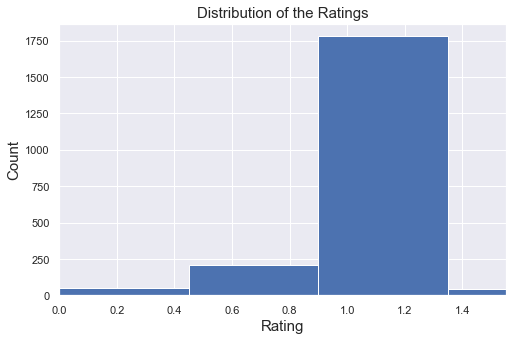

In [203]:
df.rating.plot(kind='hist', xlim=[0,1.55], figsize=(8,5))
plt.title('Distribution of the Ratings', fontsize=15)
plt.xlabel('Rating' ,fontsize=15)
plt.ylabel('Count', fontsize=15)


he mean dog rating is 1.06 and the ratings are more frequent between .8 and 1.37.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Count')

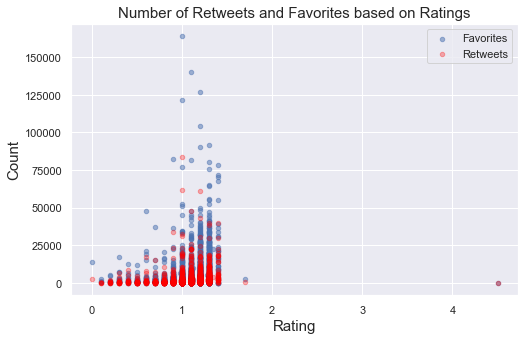

In [204]:
ax = df.plot.scatter(x='rating', y='favorite_count', alpha=0.5, label='Favorites');
df.plot.scatter(x='rating', y='retweet_count', color='red', alpha=0.3, label='Retweets', ax=ax, figsize=(8,5));
plt.title('Number of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

<ipython-input-205-7e46eb227325>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))


Text(0, 0.5, 'Count')

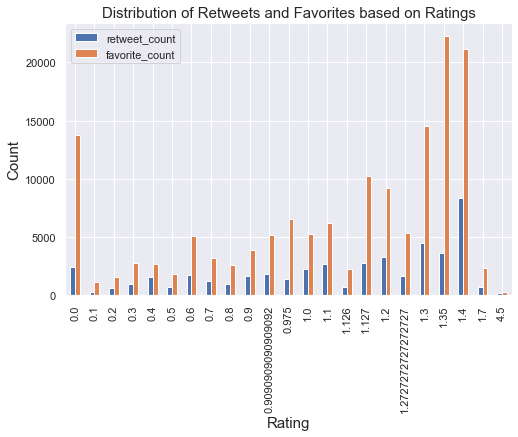

In [205]:
df.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Distribution of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)


The favorite counts are higher than the retweet counts for each rating
The dogs with the ratings between 1.3 and 1.4 are retweeted and liked most.

 there is a positive correlation between retweet counts and favorite counts based on ratings.

In [206]:
df[['rating','retweet_count','favorite_count']].corr(method = 'pearson')

,rating,retweet_count,favorite_count
rating,1.000000,0.187992,0.242798
retweet_count,0.187992,1.000000,0.797525
favorite_count,0.242798,0.797525,1.000000



There is a positive correlation between Retweet numbers and Favorites numbers. There may be no correlation between ratings and retweet numbers, as well as preferred ratings and counts. It's normal for other people to like or retweet your Tweets regardless of their ratings but with regard to the photos. Another reason may be the harmony between the image and the tweet, if followers consider the text or image funny, then it may get more likes and tweets even if it has a low rating.



In [207]:
df.breed.value_counts()[:30]

None                              587
Golden Retriever                  173
Labrador Retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy Poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Cocker Spaniel                     34
Malamute                           34
French Bulldog                     32
Chesapeake Bay Retriever           31
Miniature Pinscher                 26
Cardigan                           23
Eskimo Dog                         22
Staffordshire Bullterrier          22
Beagle                             21
German Shepherd                    21
Siberian Husky                     20
Shih-Tzu                           20
Rottweiler                         19
Lakeland Terrier                   19
Shetland Sheepdog                  19
Maltese Dog                        19
Kuvasz      

Text(0.5, 0, 'Breed')

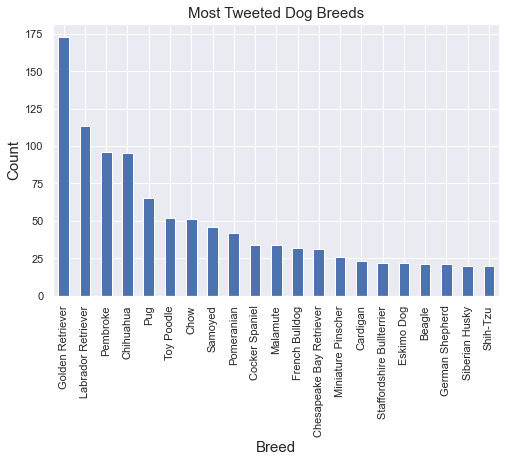

In [208]:
Most_Tweeted_breeds=df.groupby('breed').filter(lambda x: 200 > len(x) > 19)
Most_Tweeted_breeds['breed'].value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('Most Tweeted Dog Breeds', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Breed', fontsize=15)

Most tweeted dog breeds in order: Golden Retriever,
    Labrador Retriever, Pembroke, Chihuahua, Pug. Golden Retriever is substantially higher.

In [ ]:
Most_Tweeted_breeds.groupby('breed')['rating'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5,figsize=(8,5))
plt.title('Average Ratings for Most Tweeted Dog Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)

Most tweeted dog breeds with the highest rating in order: 
   shilh-Tzu, Pomeranian, Beagle

Text(0, 0.5, 'Average favorite counts')

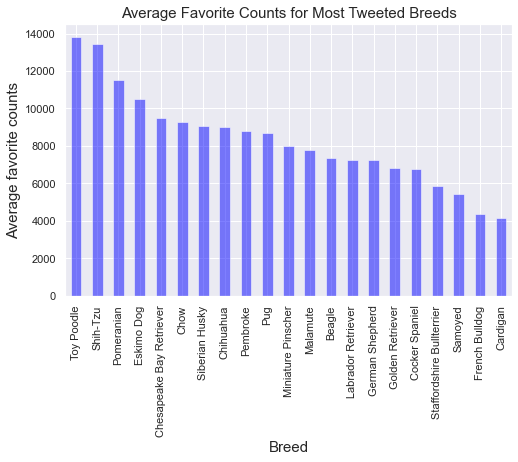

In [209]:
Most_Tweeted_breeds.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5, figsize=(8,5))
plt.title('Average Favorite Counts for Most Tweeted Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average favorite counts', fontsize=15)

In [ ]:
Most tweeted dog breeds with the highest number of likes: ToyPodle, Shih-tzu, Eskimo Dog, 

Most liked breeds differ from the breeds with highest ratings. shilh-Tzu, Pomeranian, Dog are common in the both lists.

In [212]:
df.dog_stage.value_counts()

None      1966
pupper     239
doggo       80
puppo       29
floof       23
Name: dog_stage, dtype: int64

There are 1965 dogs with unknown dog stage. 
It is a very high number
I will exclude the category 'None' and continue to analyze it.

Text(0.5, 0, 'Dog Stage')

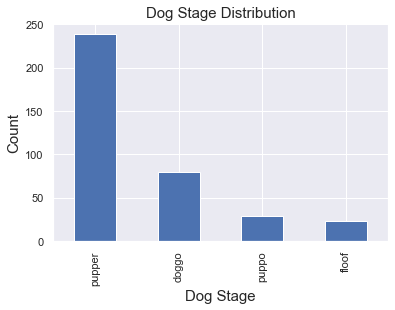

In [213]:
dog_stages=df.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Dog Stage Distribution', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)

Most of the dogs are pupper.

Text(0, 0.5, 'Avarage Rating')

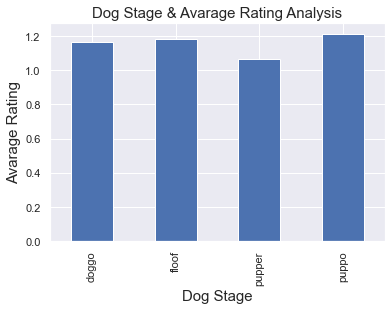

In [214]:
dog_stages.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Rating Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Rating', fontsize=15)

he puppos has the highest favorite counts.
Although, the puppers are more tweeted about, they have the lowest rating and favorite counts.

The highest average rating is owned by puppos.


Text(0, 0.5, 'Avarage Favorite Count')

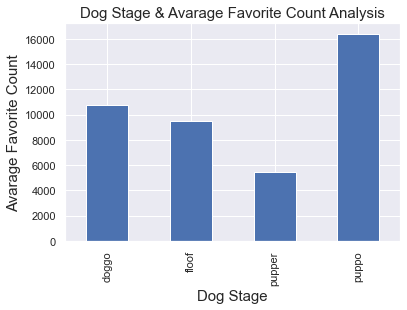

In [216]:
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Favorite Count Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Favorite Count', fontsize=15)

The puppos has the highest favorite counts.
Although, the puppers are more tweeted about, they have the lowest rating and favorite counts.


In [218]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2075
dtype: int64

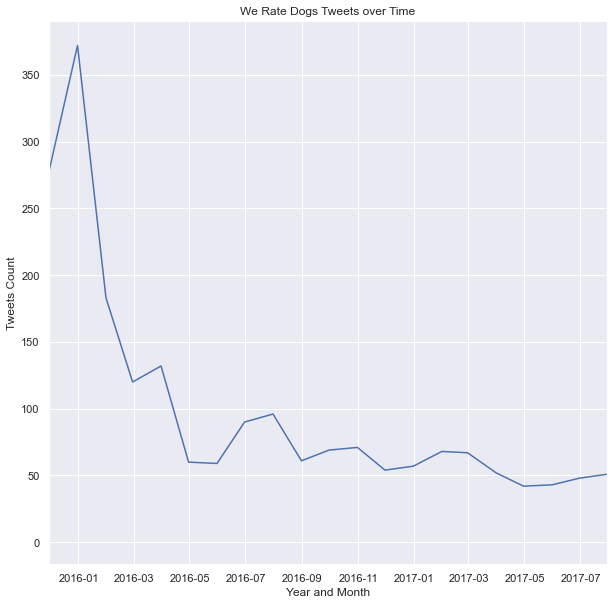

In [221]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over time tweets decreased sharply, with spikes in activity during the early of 2016(Jan),
2016(Mar), and generally decreasing from there.